In [32]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import gym
import gym_anytrading

#Stable baselines  RL stuff

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C # the algo we will using

#Processing libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 

In [34]:
df=pd.read_csv('/content/gmedata.csv')

In [35]:
df.head()

,Date,Open,High,Low,Close,Volume
0,05/14/2021,160.00,166.47,156.22,159.92,"4,293,530"
1,05/13/2021,147.44,169.95,146.43,164.50,"8,873,487"
2,05/12/2021,145.70,150.50,142.23,144.79,"2,731,510"
3,05/11/2021,137.00,150.50,136.50,146.92,"4,684,584"
4,05/10/2021,161.31,161.59,143.00,143.22,"4,806,685"


In [36]:
df.tail()

,Date,Open,High,Low,Close,Volume
248,05/20/2020,4.50,4.69,4.34,4.43,"2,543,609"
249,05/19/2020,4.58,4.75,4.37,4.44,"1,840,732"
250,05/18/2020,4.40,4.63,4.36,4.58,"2,371,694"
251,05/15/2020,4.05,4.45,4.04,4.22,"1,940,704"
252,05/14/2020,4.15,4.19,3.96,4.13,"2,004,868"


In [37]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [38]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Convert Date Column to datetime

In [39]:
df["Date"]=pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [40]:
df.sort_values('Date', ascending=True , inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
252,2020-05-14,4.15,4.19,3.96,4.13,"2,004,868"
251,2020-05-15,4.05,4.45,4.04,4.22,"1,940,704"
250,2020-05-18,4.40,4.63,4.36,4.58,"2,371,694"
249,2020-05-19,4.58,4.75,4.37,4.44,"1,840,732"
248,2020-05-20,4.50,4.69,4.34,4.43,"2,543,609"


In [41]:
#Set the Date column as index 

df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-14,4.15,4.19,3.96,4.13,"2,004,868"
2020-05-15,4.05,4.45,4.04,4.22,"1,940,704"
2020-05-18,4.40,4.63,4.36,4.58,"2,371,694"
2020-05-19,4.58,4.75,4.37,4.44,"1,840,732"
2020-05-20,4.50,4.69,4.34,4.43,"2,543,609"


In [42]:
env=gym.make('stocks-v0',df=df,frame_bound=(5,200),window_size=5)

In [43]:
env.prices

array([  4.13,   4.22,   4.58,   4.44,   4.43,   4.44,   4.18,   4.42,
         4.69,   4.33,   4.06,   4.13,   4.18,   4.44,   4.47,   4.14,
         5.01,   4.96,   5.07,   4.37,   4.72,   4.69,   4.64,   4.76,
         4.95,   4.88,   4.87,   4.83,   4.41,   4.46,   4.35,   4.38,
         4.34,   4.44,   4.29,   4.24,   4.09,   4.26,   4.21,   4.34,
         4.26,   4.08,   4.19,   4.17,   3.96,   3.85,   4.01,   4.11,
         4.11,   4.03,   4.01,   3.94,   4.06,   4.1 ,   4.01,   4.15,
         4.43,   4.63,   4.43,   4.16,   4.33,   4.35,   4.52,   4.64,
         4.75,   4.63,   4.81,   4.72,   4.61,   5.03,   4.87,   4.98,
         5.11,   5.25,   5.39,   6.68,   7.65,   7.71,   7.82,   7.65,
         7.7 ,   7.35,   6.23,   6.09,   6.91,   7.09,   8.68,   9.2 ,
         9.47,   8.75,  10.56,  10.04,   9.14,  10.02,  10.09,  10.35,
        10.2 ,   9.77,   9.39,   9.46,   9.13,   9.36,  13.49,  12.02,
        11.8 ,  11.88,  12.25,  13.83,  13.31,  13.91,  13.86,  14.1 ,
      

In [44]:
env.signal_features

array([[ 4.1300e+00,  0.0000e+00],
       [ 4.2200e+00,  9.0000e-02],
       [ 4.5800e+00,  3.6000e-01],
       [ 4.4400e+00, -1.4000e-01],
       [ 4.4300e+00, -1.0000e-02],
       [ 4.4400e+00,  1.0000e-02],
       [ 4.1800e+00, -2.6000e-01],
       [ 4.4200e+00,  2.4000e-01],
       [ 4.6900e+00,  2.7000e-01],
       [ 4.3300e+00, -3.6000e-01],
       [ 4.0600e+00, -2.7000e-01],
       [ 4.1300e+00,  7.0000e-02],
       [ 4.1800e+00,  5.0000e-02],
       [ 4.4400e+00,  2.6000e-01],
       [ 4.4700e+00,  3.0000e-02],
       [ 4.1400e+00, -3.3000e-01],
       [ 5.0100e+00,  8.7000e-01],
       [ 4.9600e+00, -5.0000e-02],
       [ 5.0700e+00,  1.1000e-01],
       [ 4.3700e+00, -7.0000e-01],
       [ 4.7200e+00,  3.5000e-01],
       [ 4.6900e+00, -3.0000e-02],
       [ 4.6400e+00, -5.0000e-02],
       [ 4.7600e+00,  1.2000e-01],
       [ 4.9500e+00,  1.9000e-01],
       [ 4.8800e+00, -7.0000e-02],
       [ 4.8700e+00, -1.0000e-02],
       [ 4.8300e+00, -4.0000e-02],
       [ 4.4100e+00,

Build Enviorment

In [45]:
env.action_space

Discrete(2)

info {'total_reward': 197.76999999999995, 'total_profit': 4.640598009869915, 'position': 1}


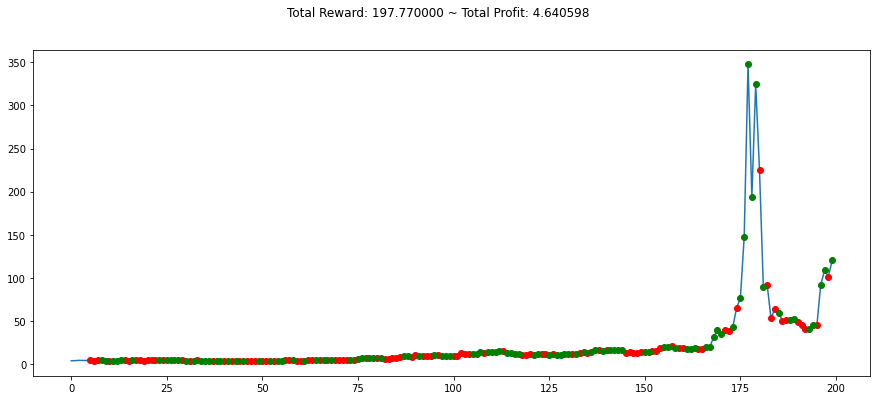

In [46]:
# Action :{ buy or sell}

state=env.reset()
while True:
    action =env.action_space.sample()
    n_state ,reward,done, info=env.step(action)
    if done:
        print('info',info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Add Custom Indicators

### 1. Import dependencies

In [47]:
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from gym_anytrading.envs import StocksEnv
from finta import TA

### 2. Fix Volume Column

In [49]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

In [50]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### Calculate SMA, RSI and OBV

In [51]:
df['SMA'] = TA.SMA(df, 12) #Simple Moving Average 
df['RSI'] = TA.RSI(df) # Relative Strength Index
df['OBV'] = TA.OBV(df) #On-balance Volume

In [52]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-14,4.15,4.19,3.96,4.13,2004868.0,NaN,NaN,NaN
2020-05-15,4.05,4.45,4.04,4.22,1940704.0,NaN,100.000000,1940704.0
2020-05-18,4.40,4.63,4.36,4.58,2371694.0,NaN,100.000000,4312398.0
2020-05-19,4.58,4.75,4.37,4.44,1840732.0,NaN,74.632523,2471666.0
2020-05-20,4.50,4.69,4.34,4.43,2543609.0,NaN,73.204060,-71943.0
2020-05-21,4.45,4.65,4.40,4.44,1971906.0,NaN,73.745230,1899963.0
2020-05-22,4.46,4.49,4.13,4.18,2379851.0,NaN,47.106883,-479888.0
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,NaN,61.081786,3066038.0
2020-05-27,4.57,4.71,4.36,4.69,3146603.0,NaN,70.518758,6212641.0


In [53]:
df.fillna(0, inplace=True)

In [54]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-14,4.15,4.19,3.96,4.13,2004868.0,0.000000,0.000000,0.0
2020-05-15,4.05,4.45,4.04,4.22,1940704.0,0.000000,100.000000,1940704.0
2020-05-18,4.40,4.63,4.36,4.58,2371694.0,0.000000,100.000000,4312398.0
2020-05-19,4.58,4.75,4.37,4.44,1840732.0,0.000000,74.632523,2471666.0
2020-05-20,4.50,4.69,4.34,4.43,2543609.0,0.000000,73.204060,-71943.0
2020-05-21,4.45,4.65,4.40,4.44,1971906.0,0.000000,73.745230,1899963.0
2020-05-22,4.46,4.49,4.13,4.18,2379851.0,0.000000,47.106883,-479888.0
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,0.000000,61.081786,3066038.0
2020-05-27,4.57,4.71,4.36,4.69,3146603.0,0.000000,70.518758,6212641.0


### 4. New Custom Environment

In [57]:
def add_signals(env):
  start = env.frame_bound[0]-env.window_size
  end = env.frame_bound[1]
  prices = env.df.loc[:,'Low'].to_numpy()[start:end]
  signal_features = env.df.loc[:, ['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
  return prices, signal_features

In [58]:
class MyCustomEnv(StocksEnv):
  _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [59]:
env2.prices

array([3.96, 4.04, 4.36, 4.37, 4.34, 4.4 , 4.13, 4.33, 4.36, 4.3 , 4.05,
       4.02, 4.06, 4.2 , 4.37, 4.09, 4.27, 4.55, 4.68, 4.18, 4.39, 4.42,
       4.51, 4.53, 4.65, 4.69, 4.72, 4.8 , 4.38, 4.3 , 4.27, 4.3 , 4.2 ,
       4.31, 4.29, 4.19, 4.06, 4.03, 4.13, 4.18, 4.26, 4.07, 4.13, 4.09,
       3.94, 3.77, 3.88, 3.92, 4.06, 4.01])

In [61]:
env2.signal_features

array([[ 3.96000000e+00,  2.00486800e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.04000000e+00,  1.94070400e+06,  0.00000000e+00,
         1.00000000e+02,  1.94070400e+06],
       [ 4.36000000e+00,  2.37169400e+06,  0.00000000e+00,
         1.00000000e+02,  4.31239800e+06],
       [ 4.37000000e+00,  1.84073200e+06,  0.00000000e+00,
         7.46325229e+01,  2.47166600e+06],
       [ 4.34000000e+00,  2.54360900e+06,  0.00000000e+00,
         7.32040596e+01, -7.19430000e+04],
       [ 4.40000000e+00,  1.97190600e+06,  0.00000000e+00,
         7.37452298e+01,  1.89996300e+06],
       [ 4.13000000e+00,  2.37985100e+06,  0.00000000e+00,
         4.71068829e+01, -4.79888000e+05],
       [ 4.33000000e+00,  3.54592600e+06,  0.00000000e+00,
         6.10817863e+01,  3.06603800e+06],
       [ 4.36000000e+00,  3.14660300e+06,  0.00000000e+00,
         7.05187576e+01,  6.21264100e+06],
       [ 4.30000000e+00,  2.18436700e+06,  0.00000000e+00,
         5.23066545e+01

In [60]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-14,4.15,4.19,3.96,4.13,2004868.0,0.0,0.000000,0.0
2020-05-15,4.05,4.45,4.04,4.22,1940704.0,0.0,100.000000,1940704.0
2020-05-18,4.40,4.63,4.36,4.58,2371694.0,0.0,100.000000,4312398.0
2020-05-19,4.58,4.75,4.37,4.44,1840732.0,0.0,74.632523,2471666.0
2020-05-20,4.50,4.69,4.34,4.43,2543609.0,0.0,73.204060,-71943.0


Build Enviorment and Train

In [62]:
env_maker=lambda: env2

env=DummyVecEnv([env_maker])

In [67]:
model=A2C('MlpLstmPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -4.47    |
| fps                | 24       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.000606 |
| fps                | 456      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 3.31     |
---------------------------------
---------------------------------
| explained_variance | -0.00144 |
| fps                | 512      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 111      |
---------------------------------
---------------------------------
| explained_variance | -979     |
| fps                | 531      |
| nupdates           | 300      |
| policy_entr

Evaluation

info {'total_reward': 238.25, 'total_profit': 16.32998855202684, 'position': 1}


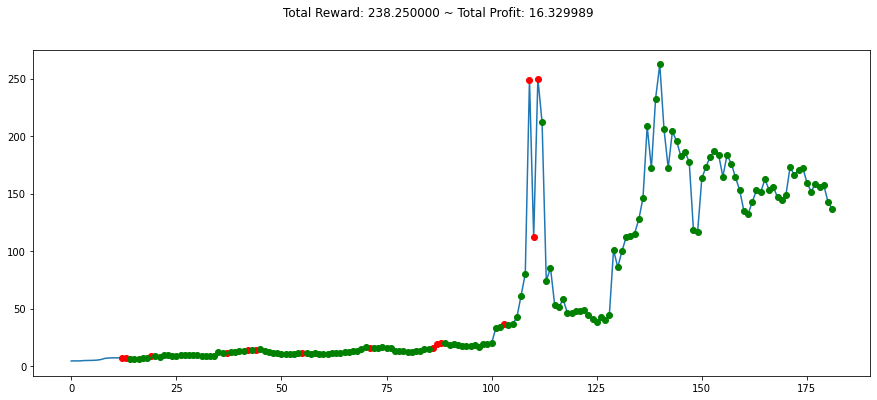

In [68]:
#Setting up the Agent Environment
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()